In [2]:
from google.colab import files
uploaded=files.upload()
file_path = list(uploaded.keys())[0]

Saving Lab Session Data.xlsx to Lab Session Data.xlsx


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import jaccard
import warnings
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore")

In [4]:
#Q1
df = pd.read_excel(file_path, sheet_name='Purchase data')

# Extract Matrix A (product quantities) and C (payment)
A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].dropna()
C = df['Payment (Rs)'].dropna()

# Convert to numpy
A_matrix = A.to_numpy()
C_vector = C.to_numpy()
# A1 Results
dim = A_matrix.shape[1]
num_vectors = A_matrix.shape[0]
rank = np.linalg.matrix_rank(A_matrix)
costs = np.linalg.pinv(A_matrix) @ C_vector

print("Dimensionality of vector space:", dim)
print("Number of vectors:", num_vectors)
print("Rank of Matrix A:", rank)
print("Estimated Product Costs:")
print("  Candy  : ₹{:.2f}".format(costs[0]))
print("  Mango  : ₹{:.2f}".format(costs[1]))
print("  Milk   : ₹{:.2f}".format(costs[2]))

Dimensionality of vector space: 3
Number of vectors: 10
Rank of Matrix A: 3
Estimated Product Costs:
  Candy  : ₹1.00
  Mango  : ₹55.00
  Milk   : ₹18.00


In [5]:
#Q2
# Classify customers based on Payment (Rs)
df['Label'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')

# Print first 10 classifications
print("Customer Classification")
print(df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)', 'Label']].head(10))

Customer Classification
   Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Label
0           20             6                 2           386  RICH
1           16             3                 6           289  RICH
2           27             6                 2           393  RICH
3           19             1                 2           110  POOR
4           24             4                 2           280  RICH
5           22             1                 5           167  POOR
6           15             4                 2           271  RICH
7           18             4                 2           274  RICH
8           21             1                 4           148  POOR
9           16             2                 4           198  POOR


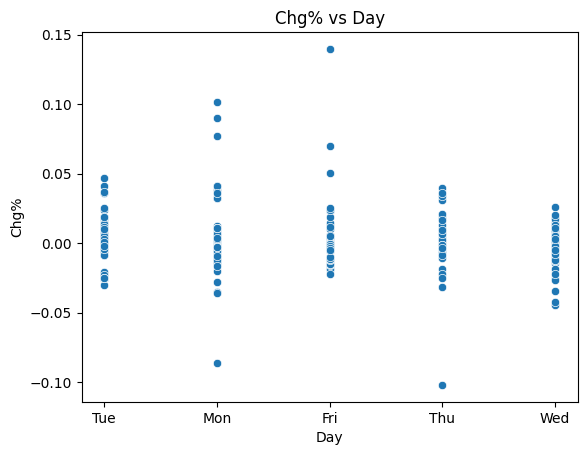

Mean of Price: 1560.66
Variance of Price: 58732.37
Mean Price on Wednesdays: 1550.71
Mean Price in April: 1698.95
Probability of Loss: 0.498
Probability of Profit on Wednesday: 0.42


In [6]:
#Q3
# Load the IRCTC sheet
irctc_df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# 1. Mean and variance of Price
mean_price = statistics.mean(irctc_df['Price'])
var_price = statistics.variance(irctc_df['Price'])

# 2. Mean on Wednesdays
mean_wed = statistics.mean(irctc_df[irctc_df['Day'] == 'Wed']['Price'])

# 3. Mean in April
mean_apr = statistics.mean(irctc_df[irctc_df['Month'] == 'Apr']['Price'])

# 4. Probability of loss (Chg% < 0)
prob_loss = (irctc_df['Chg%'] < 0).mean()

# 5. Probability of profit on Wednesday
prob_profit_wed = ((irctc_df['Chg%'] > 0) & (irctc_df['Day'] == 'Wed')).sum() / (irctc_df['Day'] == 'Wed').sum()

# 6. Scatter Plot
sns.scatterplot(x='Day', y='Chg%', data=irctc_df)
plt.title("Chg% vs Day")
plt.show()

# Print all results
print("Mean of Price:", round(mean_price, 2))
print("Variance of Price:", round(var_price, 2))
print("Mean Price on Wednesdays:", round(mean_wed, 2))
print("Mean Price in April:", round(mean_apr, 2))
print("Probability of Loss:", round(prob_loss, 4))
print("Probability of Profit on Wednesday:", round(prob_profit_wed, 4))

In [7]:
#Q4
# Load thyroid sheet
thyroid_df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

# 1. Describe dataset (all columns)
desc = thyroid_df.describe(include='all')

# 2. Check missing values
missing = thyroid_df.isnull().sum()

# 3. Data types and unique values

print("\nData Types:\n", thyroid_df.dtypes)
print("\nMissing Values:\n", missing)
print("\nUnique Values per Column:\n", thyroid_df.nunique())
print("\nDescriptive Statistics:\n", desc)

# 4. Detect categorical features
categorical_cols = thyroid_df.select_dtypes(include='object').columns.tolist()
print("\nCategorical Columns:", categorical_cols)

# 5. Check for outliers (for numeric columns)
print("\nChecking for outliers (Q1 - 1.5*IQR, Q3 + 1.5*IQR):")
for col in thyroid_df.select_dtypes(include=np.number).columns:
    Q1 = thyroid_df[col].quantile(0.25)
    Q3 = thyroid_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = thyroid_df[(thyroid_df[col] < Q1 - 1.5 * IQR) | (thyroid_df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")

# 6. Mean and variance for numeric columns
print("\nMean and Variance for Numeric Columns:")
for col in thyroid_df.select_dtypes(include=np.number).columns:
    mean = thyroid_df[col].mean()
    var = thyroid_df[col].var()
    print(f"{col}: Mean = {mean:.2f}, Variance = {var:.2f}")



Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured  

In [8]:
#Q5
# Step 1: Encode categorical data first
df_encoded = thyroid_df.copy()

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Step 2: Take only binary (0 or 1) attributes
binary_df = df_encoded.loc[:, df_encoded.nunique() == 2]

# Step 3: Select first two observation vectors
vec1 = binary_df.iloc[0].to_numpy()
vec2 = binary_df.iloc[1].to_numpy()

# Step 4: Compute JC and SMC
def jaccard_smc(v1, v2):
    f11 = np.sum((v1 == 1) & (v2 == 1))
    f00 = np.sum((v1 == 0) & (v2 == 0))
    f10 = np.sum((v1 == 1) & (v2 == 0))
    f01 = np.sum((v1 == 0) & (v2 == 1))

    jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
    smc = (f11 + f00) / (f11 + f00 + f10 + f01) if (f11 + f00 + f10 + f01) != 0 else 0
    return jc, smc

jc, smc = jaccard_smc(vec1, vec2)

# Step 5: Print the results

print(f"Jaccard Coefficient (JC): {jc:.4f}")
print(f"Simple Matching Coefficient (SMC): {smc:.4f}")

Jaccard Coefficient (JC): 0.2500
Simple Matching Coefficient (SMC): 0.8500


In [9]:
#Q6

# Use all attributes from encoded dataset
vec1 = df_encoded.iloc[0].to_numpy().reshape(1, -1)
vec2 = df_encoded.iloc[1].to_numpy().reshape(1, -1)

# Compute cosine similarity
cos_sim = cosine_similarity(vec1, vec2)[0][0]

# Output
print(f"Cosine Similarity: {cos_sim:.4f}")

Cosine Similarity: 1.0000


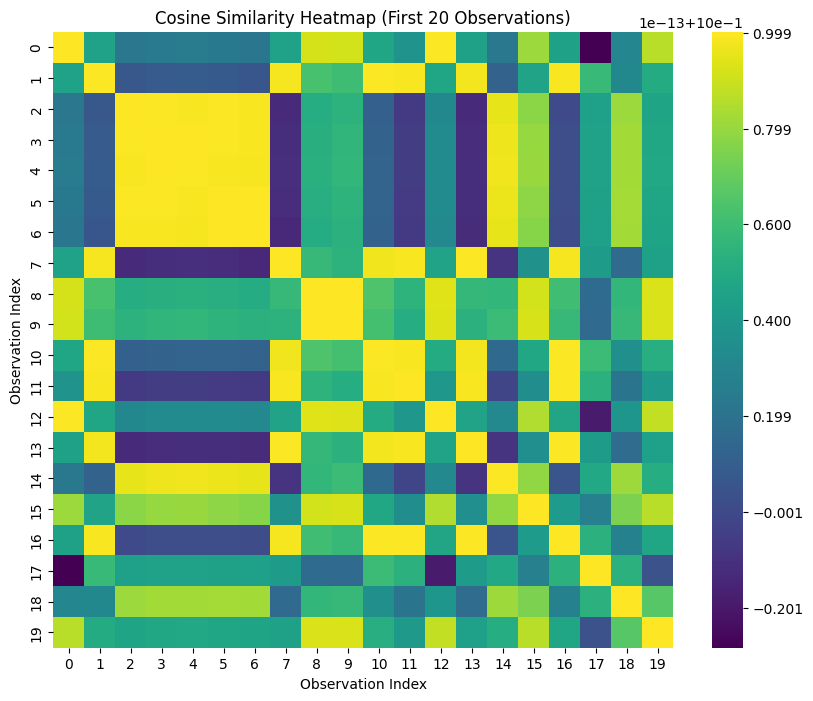

In [10]:
#Q7

# Step 1: Take first 20 observations
first_20 = df_encoded.iloc[:20]

# Step 2: Create cosine similarity matrix
cos_sim_matrix = cosine_similarity(first_20)

# Step 3: Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix, annot=False, cmap='viridis')
plt.title("Cosine Similarity Heatmap (First 20 Observations)")
plt.xlabel("Observation Index")
plt.ylabel("Observation Index")
plt.show()


In [38]:
#Q8

def impute_missing(df):
    for col in df.columns:
        if df[col].isnull().sum() == len(df[col]):
            print(f"Column '{col}' has all missing values ")
            continue

        if df[col].dtype == 'object':
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"Column '{col}' is categorical → filled missing values with mode: {mode_value}")

        elif df[col].dtype in ['int64', 'float64']:
            if df[col].nunique() < 10:
                median_value = df[col].median()
                df[col].fillna(median_value, inplace=True)
                print(f"Column '{col}' is numeric (likely with outliers) → filled missing values with median: {median_value}")
            else:
                mean_value = df[col].mean()
                df[col].fillna(mean_value, inplace=True)
                print(f"Column '{col}' is numeric without outliers → filled missing values with mean: {mean_value}")
    return df


In [35]:
df_cleaned = impute_missing(df)

Column 'Customer' is categorical → filled missing values with mode: C_1
Column 'Candies (#)' is numeric (likely with outliers) → filled missing values with median: 19.5
Column 'Mangoes (Kg)' is numeric (likely with outliers) → filled missing values with median: 3.5
Column 'Milk Packets (#)' is numeric (likely with outliers) → filled missing values with median: 2.0
Column 'Payment (Rs)' is numeric without outliers → filled missing values with mean: 251.6
Column 'Unnamed: 5' has all missing values 
Column 'Unnamed: 6' has all missing values 
Column 'Unnamed: 7' has all missing values 
Column 'Unnamed: 8' has all missing values 
Column 'Unnamed: 9' has all missing values 
Column 'Unnamed: 10' has all missing values 
Column 'Unnamed: 11' has all missing values 
Column 'Unnamed: 12' has all missing values 
Column 'Unnamed: 13' has all missing values 
Column 'Unnamed: 14' has all missing values 
Column 'Unnamed: 15' has all missing values 
Column 'Unnamed: 16' has all missing values 
Column 

In [36]:
#Q9

from sklearn.preprocessing import MinMaxScaler

def normalize_columns(df, columns):
    scaler = MinMaxScaler()
    print("Normalizing the following columns:")
    for col in columns:
        print(f"→ Column '{col}' scaled using Min-Max Scaling.")
    df[columns] = scaler.fit_transform(df[columns])
    return df

In [37]:
# Step 1: Identify numeric columns
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Normalize
df_normalized = normalize_columns(df_encoded.copy(), numeric_cols)


Normalizing the following columns:
→ Column 'Record ID' scaled using Min-Max Scaling.
→ Column 'age' scaled using Min-Max Scaling.
→ Column 'sex' scaled using Min-Max Scaling.
→ Column 'on thyroxine' scaled using Min-Max Scaling.
→ Column 'query on thyroxine' scaled using Min-Max Scaling.
→ Column 'on antithyroid medication' scaled using Min-Max Scaling.
→ Column 'sick' scaled using Min-Max Scaling.
→ Column 'pregnant' scaled using Min-Max Scaling.
→ Column 'thyroid surgery' scaled using Min-Max Scaling.
→ Column 'I131 treatment' scaled using Min-Max Scaling.
→ Column 'query hypothyroid' scaled using Min-Max Scaling.
→ Column 'query hyperthyroid' scaled using Min-Max Scaling.
→ Column 'lithium' scaled using Min-Max Scaling.
→ Column 'goitre' scaled using Min-Max Scaling.
→ Column 'tumor' scaled using Min-Max Scaling.
→ Column 'hypopituitary' scaled using Min-Max Scaling.
→ Column 'psych' scaled using Min-Max Scaling.
→ Column 'TSH measured' scaled using Min-Max Scaling.
→ Column 'TSH' 